In [ ]:
!pip install visualkeras
!pip install numpy
!pip install tensorflow
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
import visualkeras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.python.keras.utils import np_utils
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir("../")
%matplotlib inline 

Predefining the global variables related to the dataset

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
#for validation test split
TEST_SIZE = 0.10
RANDOM_STATE = 42
#for the model
NO_EPOCHS = 50
BATCH_SIZE = 32
CLASSES = ['T-shirt/top', 
           'Trousers', 
           'Pullover', 
           'Dress', 'Coat', 
           'Sandal', 
           'Shirt', 
           'Sneaker', 
           'Bag', 
           'Ankle boot']

Loading the dataset from the data folder

In [3]:
train=pd.read_csv("data/fashion-mnist_train.csv")
test=pd.read_csv("data/fashion-mnist_test.csv")

In [4]:
def data_preprocessing(dataset):
    out_y = np_utils.to_categorical(dataset.label, NUM_CLASSES) #one-hot encoding the feature
    num_images = dataset.shape[0]
    x_as_array = dataset.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255 #normalizing the data
    return out_x, out_y
X, y = data_preprocessing(train)
X_test, y_test = data_preprocessing(test)

Lets view the data now

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i]) #calling the .values of each row
plt.show()

# Lets move on to the data augmentation segment

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE) # making the validation set

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [8]:
datagen.fit(X_train) #making the ImageDataGenerator ready

# Lets move on now to make the model

In [9]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(Conv2D(256, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'))
model.add(Conv2D(256, 
                 kernel_size=(3, 3), 
                 padding='same',
                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="Adam",
              metrics=['accuracy'])

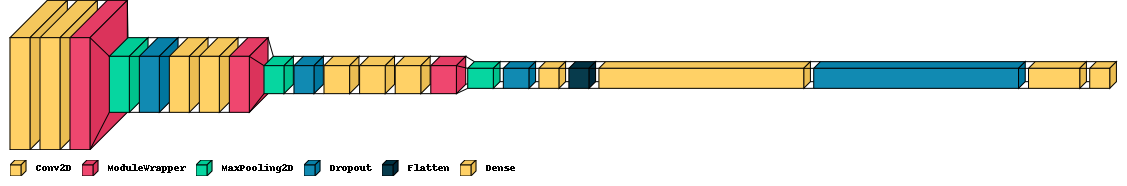

In [10]:
visualkeras.layered_view(model, legend=True)

In [ ]:
model.summary()

In [19]:
reduce_lr_onplat = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
early_stopper=EarlyStopping(monitor='val_loss', patience=3)

train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val),callbacks=[reduce_lr_onplat])

Epoch 1/50
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0271 - accuracy: 0.9908 - val_loss: 0.3656 - val_accuracy: 0.9423
Epoch 2/50
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0270 - accuracy: 0.9906 - val_loss: 0.3558 - val_accuracy: 0.9430
Epoch 3/50
1688/1688 [==============================] - 19s 12ms/step - loss: 0.0255 - accuracy: 0.9911 - val_loss: 0.3647 - val_accuracy: 0.9437
Epoch 4/50
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0252 - accuracy: 0.9913 - val_loss: 0.3633 - val_accuracy: 0.9418
Epoch 5/50
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0234 - accuracy: 0.9917 - val_loss: 0.3895 - val_accuracy: 0.9418
Epoch 6/50
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0228 - accuracy: 0.9922 - val_loss: 0.3810 - val_accuracy: 0.9410
Epoch 7/50
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0224 - accuracy: 0.9922 - val_loss: 0.3798 -

# Now lets evaluate the model and plot some characterestics

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3368 - accuracy: 0.9455


[0.336794376373291, 0.9455000162124634]

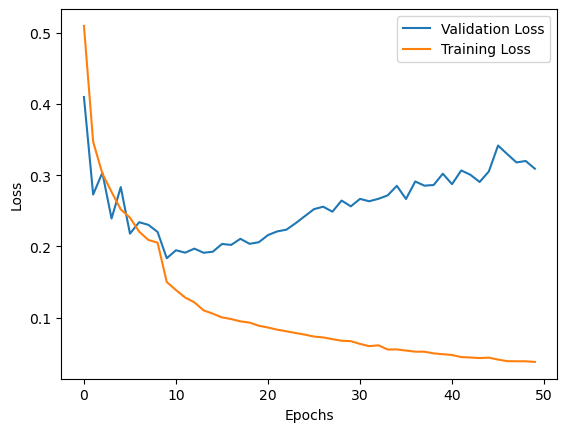

In [14]:
plt.plot(train_model.history['val_loss'], label="Validation Loss")
plt.plot(train_model.history['loss'], label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(train_model.history['val_accuracy'], label="Validation Acc.")
plt.plot(train_model.history['accuracy'], label="Training Acc.")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()